In [0]:
from google.colab import files
from IPython.display import Image

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np
import skimage
from skimage import data, io

In [4]:
from google.colab import drive
drive.mount('Mount')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at Mount


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.chdir("Mount/My Drive/Imagens_PDI/imagens_trab")

!ls

OSError: ignored

In [0]:
img_original = image.imread('2817540617.jpg')
img = img_original.copy()
img

array([[[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       ...,

       [[29, 28, 24],
        [30, 29, 25],
        [28, 27, 23],
        ...,
        [ 5,  5,  7],
        [ 5,  5,  7],
        [ 5,  5,  7]],

       [[29, 28, 24],
        [31, 30, 26],
        [29, 28, 24],
        ...,
        [ 6,  6,  8],
        [ 6,  6,  8],
        [ 6,  6,  8]],

       [[28, 27, 23],
        [32, 31, 27],
        [30, 29, 25],
        ...,
        [ 6,  6,  8],
        [ 6,  6,  8],
        [ 6,  6,  8]]], dtype=uint8)

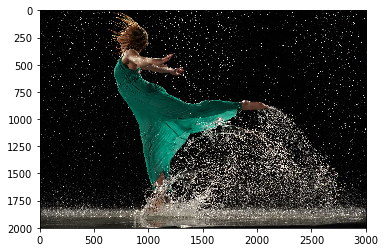

In [0]:
# Para poder editar a imagem
img.flags 
plt.imshow(img)

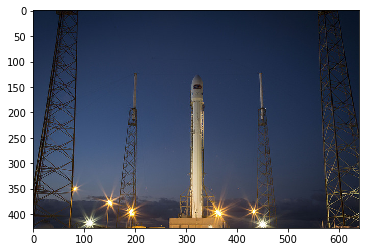

In [0]:
foguete = camera = data.rocket()
plt.imshow(foguete)


In [0]:
foguete.shape


(427, 640, 3)

## 2.EXIBIÇÃO DE BANDAS INDIVIDUAIS

In [0]:
def display_rgb(photo, rgb = 'all'):
  display_r = photo[:,:,0]
  display_g = photo[:,:,1]
  display_b = photo[:,:,2]
  if rgb == 'r':
    plt.imshow(display_r, 'gray')
  elif rgb == 'g':
    plt.imshow(display_g, 'gray')
  elif rgb == 'b':
    plt.imshow(display_b, 'gray')   
  else:
    plt.figure(figsize=(20,10))

    plt.subplot(1, 3, 1)
    plt.imshow(display_r, 'gray')

    plt.subplot(1, 3, 2)
    plt.imshow(display_g, 'gray')

    plt.subplot(1, 3, 3)
    plt.imshow(display_b, 'gray')
plt.show()

    
    

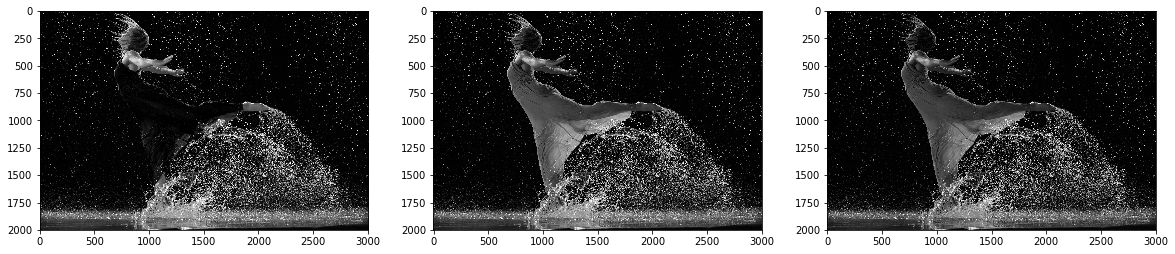

In [0]:
display_rgb(img)

## 1. CONVERSÃO RBG-YIQ

In [0]:
def to_yiq(photo):
  shape = photo.shape
  yiq = np.zeros(photo.shape)
  for i in range(0,shape[0]):
    for j in range(0,shape[1]):
      yiq[i,j,0] = (0.299*photo[i,j,0] + 0.587*photo[i,j,1] + 0.114*photo[i,j,2]) #Y
      yiq[i,j,1] = (0.596*photo[i,j,0] - 0.274*photo[i,j,1] - 0.322*photo[i,j,2]) #I
      yiq[i,j,2] = (0.211*photo[i,j,0] - 0.523*photo[i,j,1] + 0.312*photo[i,j,2]) #Q
      
  return yiq
    
    
  

In [0]:
print(img[0,0])
print(img[50,50])
print(img[200,200])
print(img[300,300])
print(img[400,300])
print(img[300,400])
print(img[1300,1400])


[1 1 1]
[3 3 3]
[5 5 5]
[32 32 32]
[3 3 3]
[6 4 5]
[0 0 0]


In [0]:
img_yiq = to_yiq(img)

print(img_yiq[0,0])
print(img_yiq[50,50])
print(img_yiq[200,200])
print(img_yiq[300,300])
print(img_yiq[400,300])
print(img_yiq[300,400])
print(img_yiq[1300,1400])

[ 1.00000000e+00 -5.55111512e-17 -5.55111512e-17]
[ 3.00000000e+00 -2.22044605e-16  0.00000000e+00]
[ 5.00000000e+00 -2.22044605e-16 -2.22044605e-16]
[ 3.20000000e+01 -1.77635684e-15 -1.77635684e-15]
[ 3.00000000e+00 -2.22044605e-16  0.00000000e+00]
[4.712 0.87  0.734]
[0. 0. 0.]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


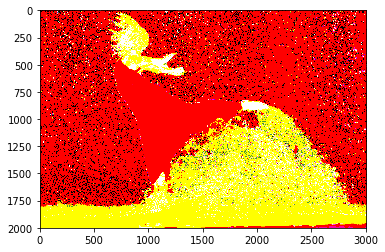

In [0]:
plt.imshow(img_yiq)

## YIQ TO RBG

In [0]:
def from_yiq(photo):
  shape = photo.shape
  rgb = np.zeros(photo.shape, dtype = int)
  for i in range(0,shape[0]): 
    for j in range(0,shape[1]):
      rgb[i,j,0] = min((1.000*photo[i,j,0] + 0.956*photo[i,j,1] + 0.621*photo[i,j,2]),255)
      rgb[i,j,1] = min((1.000*photo[i,j,0] - 0.272*photo[i,j,1] - 0.647*photo[i,j,2]),255)
      rgb[i,j,2] = min((1.000*photo[i,j,0] - 1.106*photo[i,j,1] + 1.703*photo[i,j,2]),255)
      
  return rgb
    

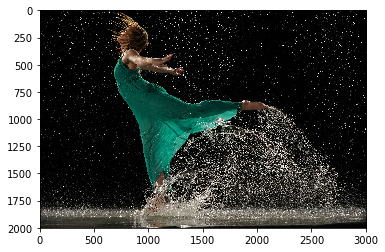

In [0]:
img_rgb = from_yiq(img_yiq)

plt.imshow(img_rgb)